# 1️⃣ What is FunctionTransformer?

#### **`FunctionTransformer`** is a class in scikit-learn (sklearn.preprocessing) that allows you to apply custom or predefined functions to transform data.

#### 📘 Think of it as a **wrapper** around any Python function that you want to use as **a feature transformation** inside a scikit-learn pipeline.

# 2️⃣ Why it’s used

#### Sometimes we need transformations that are:

- Not already built-in (like **StandardScaler** or **MinMaxScaler**)

- Custom mathematical or domain-specific logic

## 💡 Examples:

- Taking log of skewed numerical data
- Applying **`np.sqrt`**, **`np.exp`**, or any math operation
- Custom text cleaning 
- Feature engineering (ratios, percentages, etc.)
- Handling non-linear transformations

<hr>

# 🌟🌟🌟 **Important Note**:

#### ➡️ **`FunctionTransformer`** changes the **shape** of the distribution (e.g., log or sqrt transform), while **`MinMaxScaler`** only **rescales** values to a fixed range like [0, 1].
#### ➡️ So, **`FunctionTransformer`** **affects** **data distribution**, whereas **`MinMaxScaler`** **affects** only **value range**.

<hr>

# 3️⃣ How it works (Concept + Intuition)

### **`FunctionTransformer`** lets you pass your own **function** (like **`np.log1p`**, or any custom one) that will be automatically applied to your data.

#### It ensures:

- Consistency with scikit-learn’s **fit/transform** API

- Seamless integration into **Pipelines**

- Ability to use **`inverse_func`** for **inverse transformations**

- So it makes even simple transformations part of your pipeline.

# 4️⃣ Syntax and Parameters

```python
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(
    func=None,
    inverse_func=None,
    validate=False,
    kw_args=None,
    inv_kw_args=None,
    feature_names_out=None
)

```
### 🔍 Important Parameters:

| Parameter           | Description                                                                     |
| ------------------- | ------------------------------------------------------------------------------- |
| `func`              | Function to apply on input X (like `np.log1p`, `np.sqrt`, or a custom function) |
| `inverse_func`      | Function to invert the transformation (like `np.expm1` for log1p)               |
| `validate`          | If True, checks input array dimensions (usually `False` for speed)              |
| `kw_args`           | Dict of keyword arguments for `func`                                            |
| `inv_kw_args`       | Dict of keyword arguments for `inverse_func`                                    |
| `feature_names_out` | How to name features in the transformed output                                  |


# ➡️ **Converting Skewed(not normal) Data into Normal Data using Function Transformation**

- We have two columns in our file which have non-normal data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("loan_data_set.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
# since coapplication doesnot have any missing values thats why we are going to use it
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# ➡️ First Graphical View of the Data in Coapplicant Column

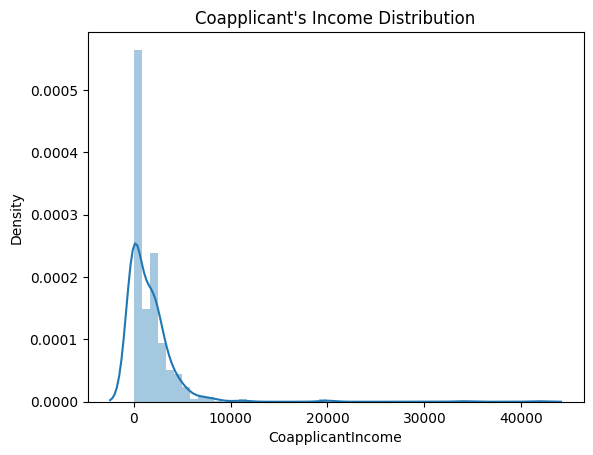

In [4]:
sns.histplot(
    x = "CoapplicantIncome",
    data = dataset,
    stat = "density",
    kde = True,
    kde_kws = dict(cut = 3),
    bins = 50,
    edgecolor = [1,1,1,0],
    alpha = 0.4
)
plt.title("Coapplicant's Income Distribution")
plt.show()


/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


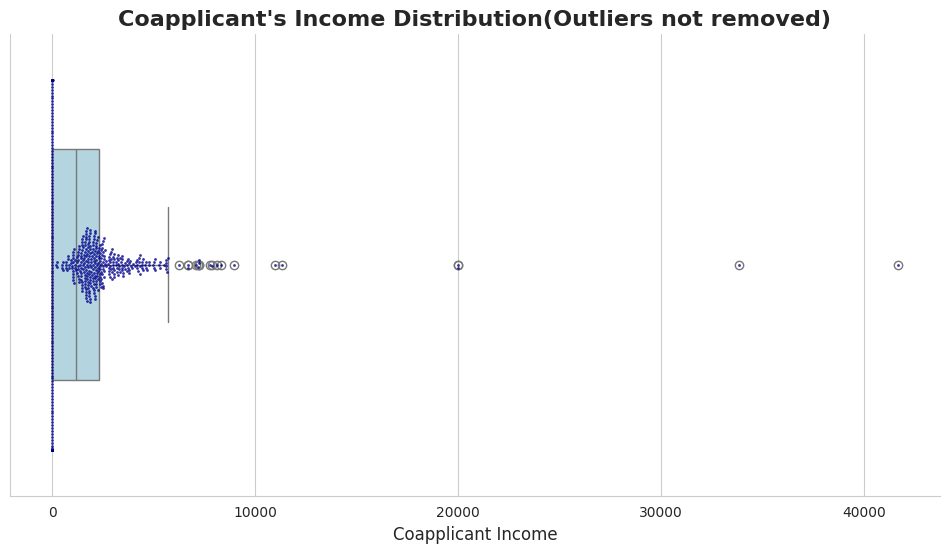

In [5]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
# plt.xlim(left = 4000, right = 6000)
plt.title("Coapplicant's Income Distribution(Outliers not removed)", fontsize = 16, fontweight = "bold")

sns.boxplot(
    x = "CoapplicantIncome",
    data = dataset,
    width = 0.5,
    color = "lightblue",
    zorder = 1 #Overlay Order
)

sns.swarmplot(
    x="CoapplicantIncome",
    data = dataset,
    size = 2,
    color = "darkblue",
    alpha = 0.8,
    zorder = 2,
)

sns.despine() #Removes the top and right spines from the plot
plt.xlabel("Coapplicant Income",fontsize = 12)
plt.show()

# 📖 Reading of Above 🔝 Graph

| **Feature** | **Interpretation** | **Value in Your Plot** |
|--------------|--------------------|-------------------------|
| **Left Edge of the Box** | **First Quartile (Q1):** 25% of coapplicants have an income less than this value. | Close to 0 (likely 0). |
| **Vertical Line Inside the Box** | **Median (Q2):** The middle value; 50% of coapplicants have an income less than this. | Around 1500. |
| **Right Edge of the Box** | **Third Quartile (Q3):** 75% of coapplicants have an income less than this value. | Around 2300. |
| **Right Whisker Tip** | **Maximum (Non-Outlier):** The largest income value that is not considered an outlier. | The maximum shown by the plot (around 5800) is the highest income after the outliers are excluded from the whisker calculation. |
| **Dots/Points to the Right** | **Outliers:** Individual data points (in the swarm plot, which is covering this) far beyond the whiskers, representing extremely high incomes. | Present (The swarm plot shows many points extending past the main box). |

## The Swarm Plot (Individual Data Points)

- The dark blue dots represent every single data point in your CoapplicantIncome column.

- It shows a large cluster of dots piled up exactly at the 0 income mark on the left. This immediately tells you that a very significant number of coapplicants have an income of zero.

- It visualizes the density—where the dots are clumped, the data is most frequent. The density is highest at 0 and then spreads out thinly as the income increases, confirming the severe right-skew.

## ↔️ Why the Left Whisker is Not Visible
- The reason the left whisker is missing is a direct result of the high number of coapplicants having 0 income.
- Basically nobody has the income in negative cause you don't work to pay, you work to get paid

    - ### The Box Plot Rule for Whiskers
      - A box plot's whisker extends to the minimum value in the data that is not an outlier. The formula for the lower fence (where the whisker ends) is:

        - **Lower Fence** = 
        $$
        {Q1 − 1.5 × IQR}
        $$
        - **where** ➡️
        $$
        {IQR = Q3 − Q1}
        $$
    - ### Analysis of The Data

        - Q1 is 0: The visual shows the left edge of your box is exactly at 0. This means that 25% of your coapplicants have an income of 0.

        - Q1=0

        - Lower Fence is Negative:

        - Q3≈2300

        - IQR≈2300−0=2300

        - Lower Fence≈0−1.5×2300=−3450

        - The Whisker Cannot Go Below Zero: Since income cannot be negative (the minimum actual data value, Min, is 0), the box plot rules force the left whisker to stop at the smallest actual data value that is greater than or equal to the calculated Lower Fence.

        - In your case, Min=0.

        - Since the lowest data point is 0, the left whisker is drawn to 0.

#### ➡️ Conclusion: The left whisker is present, but it is drawn to the 0 mark, where it is completely obscured by the left edge of the light-blue box and the massive vertical pile-up of dark blue points from the swarm plot.

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


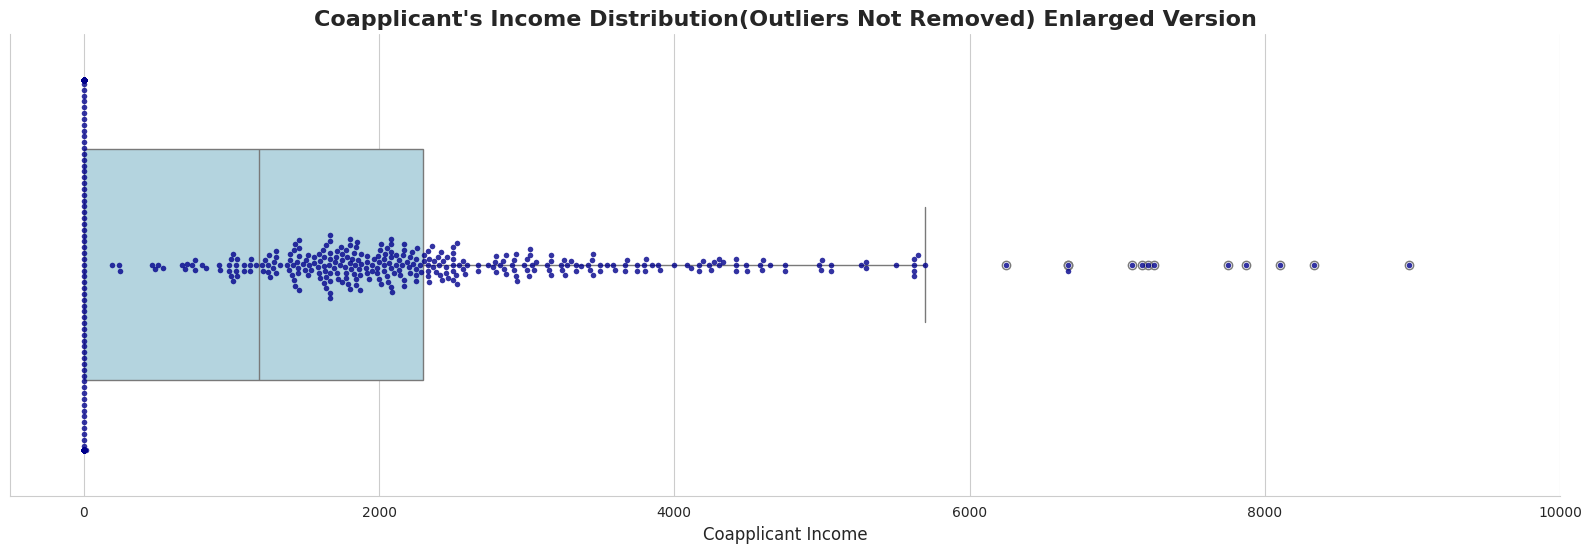

In [6]:
# Enlarged version of the same plot as above
sns.set_style("whitegrid")
plt.figure(figsize= (20,6))
plt.xlim(left = - 500,right = 10000)
plt.title("Coapplicant's Income Distribution(Outliers Not Removed) Enlarged Version", fontsize = 16, fontweight = "bold")

sns.boxplot(
    x = "CoapplicantIncome",
    data = dataset,
    width = 0.5,
    color = "lightblue",
    zorder = 1
    
)

sns.swarmplot(
    x = "CoapplicantIncome",
    data = dataset,
    size= 4,
    color= "darkblue",
    alpha = 0.8,
    zorder = 2
)


sns.despine()
plt.xlabel("Coapplicant Income", fontsize = 12)

plt.show()


# 😤 Function Transformation without removing the outliers : we do it when outlier contains the necessary or important data 

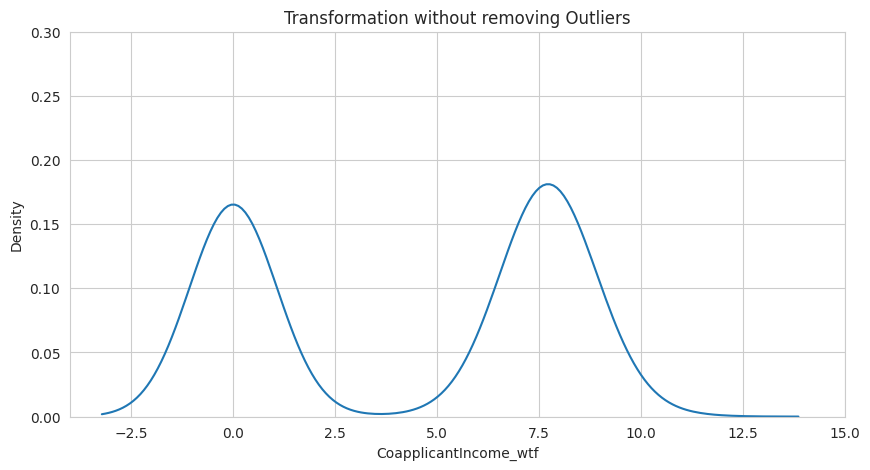

In [7]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

ft1 = FunctionTransformer(np.log1p)

dataset["CoapplicantIncome_wtf"] = ft1.fit_transform(dataset[["CoapplicantIncome"]])

plt.figure(figsize = (10,5))
plt.title("Transformation without removing Outliers")
plt.xlim(left = -4, right = 15)
plt.ylim(bottom = 0, top = 0.3 )

sns.histplot(
    x = "CoapplicantIncome_wtf",
    data = dataset,
    stat = "density",
    alpha = 0,
    kde = True,
    kde_kws = dict(cut = 3),
    edgecolor = (1,1,1,0)
    
)

plt.show()

# In seaborn.histplot, the parameter kde_kws = dict(cut = 3) is used to control how far the Kernel Density Estimate (KDE) 
# curve extends beyond the observed range of the data.

# cut: This parameter within kde_kws determines how much the KDE curve is "cut off" at the tails. The value 3 (or any positive number) means the KDE curve will extend 3 times the bandwidth beyond the minimum and maximum data points.

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


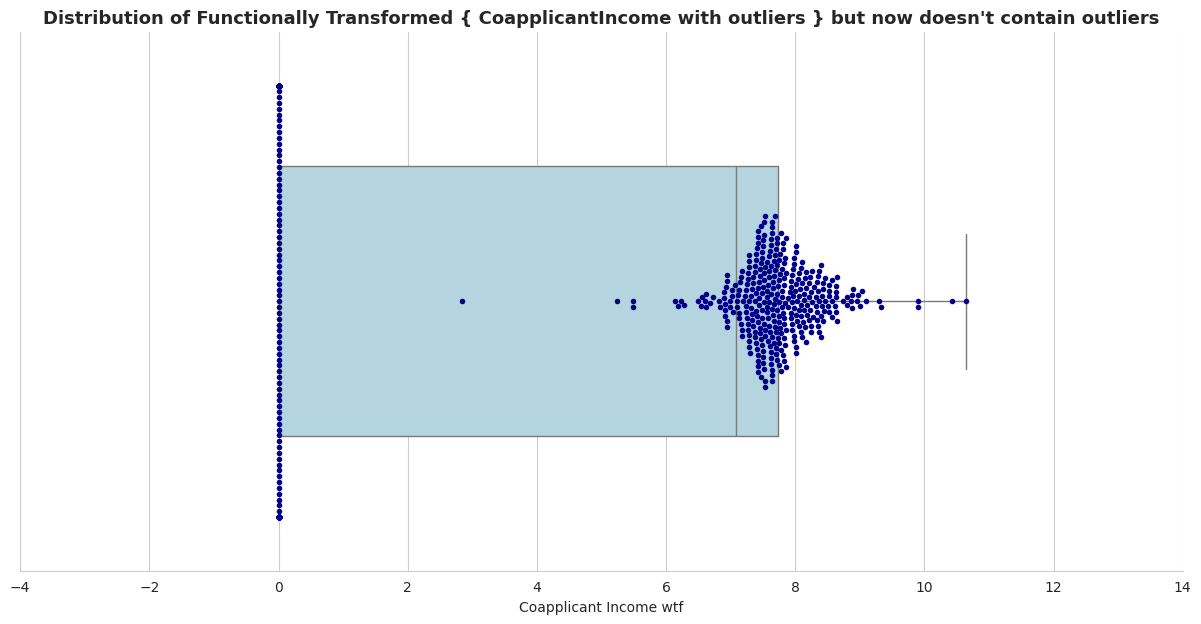

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,7))
plt.xlim(left = -4, right = 14)
plt.title("Distribution of Functionally Transformed { CoapplicantIncome with outliers } but now doesn't contain outliers",fontsize = 13, fontweight = "bold")

sns.boxplot(
    x = "CoapplicantIncome_wtf",
    data = dataset,
    width = 0.5,
    color = "lightblue",
    zorder = 1,
)

sns.swarmplot(
    x = "CoapplicantIncome_wtf",
    data = dataset,
    size = 4,
    color = "darkblue",
    zorder = 2
)

sns.despine()
plt.xlabel("Coapplicant Income wtf")
plt.show()

# 🌟 NOTE: see the above plot
- ##### In the above distribution plot we can see that when we do the function transformation even without removing the outliers, we can get a normal data without any outliers because here we are not changing the scale by transformation but instead we are change the shape of the data thats why even the outliers became the part of normalized data

<br>
<hr>
<br>

# 📤 First Here : we will remove the Outleirs in our data by using IQR
- Because it can create a problem in converting/normalizing our data 


In [9]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

print(f"Lower Bound: {lower_bound}\nUpper Bound: {upper_bound}")


Lower Bound: -3445.875
Upper Bound: 5743.125


In [10]:
dataset["CoapplicantIncome"] = dataset["CoapplicantIncome"].clip(lower=lower_bound, upper=upper_bound)
dataset["CoapplicantIncome"].max()

np.float64(5743.125)

# 📈 Distribution and Box plot after removing the Outliers

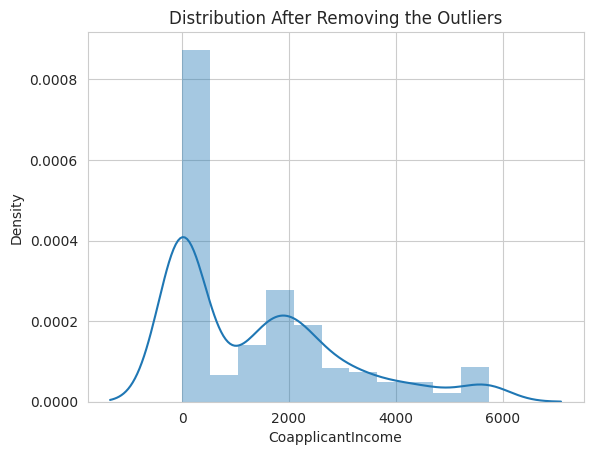

In [11]:
sns.histplot(
    x = "CoapplicantIncome",
    data = dataset,
    stat = "density",
    kde = True,
    kde_kws = dict(cut = 3), #kernel density estimation keyword arguments like bandwith adjust (bw_adjust) and line styling
    edgecolor = (1,1,1,0),
    alpha = 0.4,
    # bins = 60
    
)

plt.title("Distribution After Removing the Outliers")
plt.show()

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


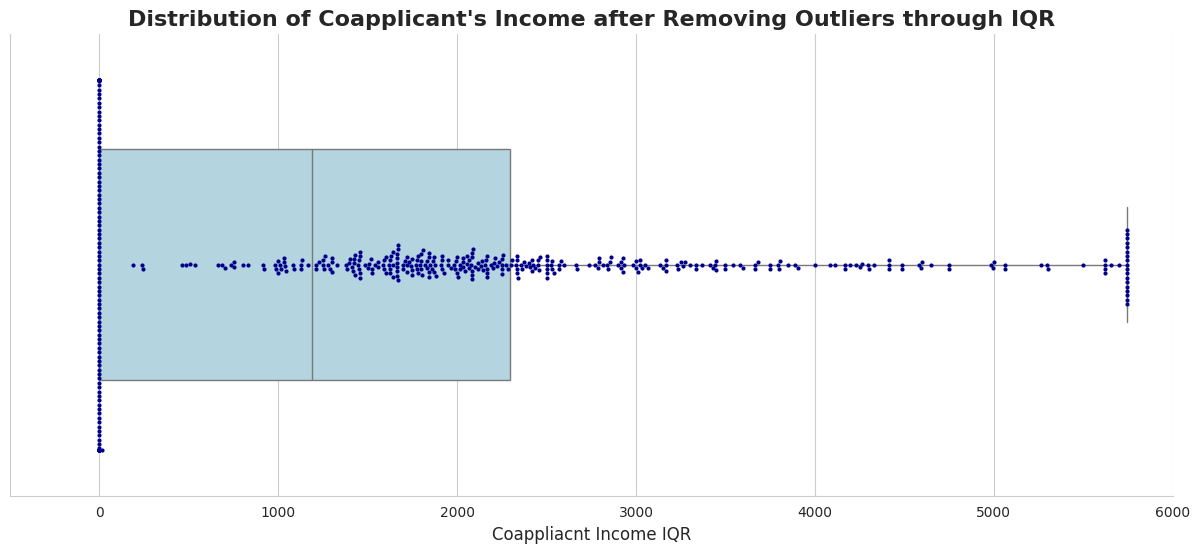

In [12]:

plt.figure(figsize=(15,6))
plt.xlim(left = -500, right = 6000)
sns.set_style("whitegrid")
plt.title("Distribution of Coapplicant's Income after Removing Outliers through IQR", fontsize = 16, fontweight = "bold")

sns.boxplot(
    x = "CoapplicantIncome",
    data = dataset,
    width = 0.5,
    color = "lightblue",
    zorder = 1,
)

sns.swarmplot(
    x = "CoapplicantIncome",
    data = dataset,
    size = 3,
    color= "darkblue",
    zorder = 2,
)
sns.despine()
plt.xlabel("Coappliacnt Income IQR",fontsize = 12)
plt.show()

# 🔶 now we will convert the data into normal distribution using **Function Transformation**



In [13]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [14]:
ft =FunctionTransformer(func = np.log1p)
# we generally use log1p because if we use the log10 then if our dataset has value 0 it will transform into a not defined value 
# log1p subtracts 1 from every datapoint 

In [15]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [16]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])

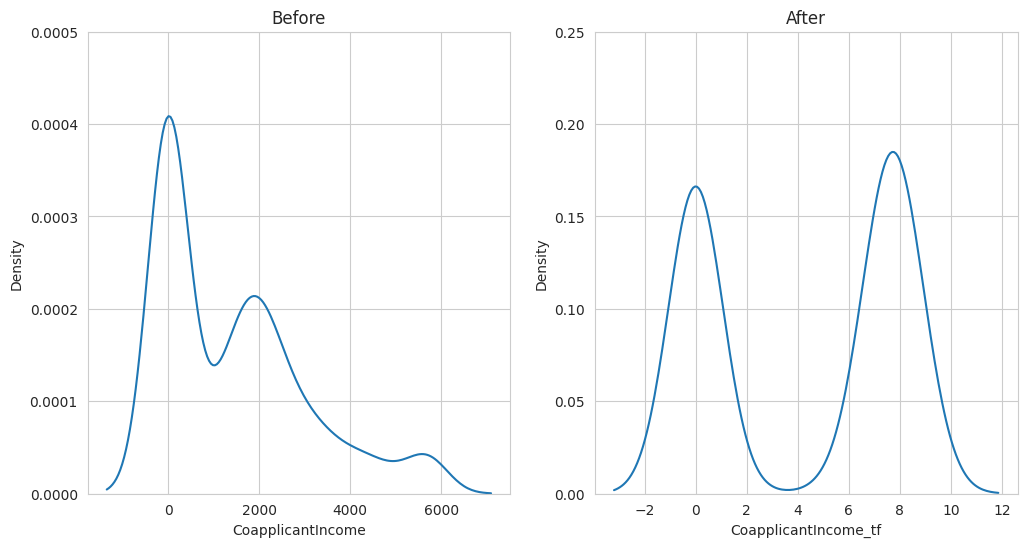

In [17]:
# now ploting the Befor and After distribution grapph 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Before")

plt.ylim(top = 0.0005,bottom = 0)
sns.histplot(
    x = "CoapplicantIncome",
    data = dataset,
    alpha = 0,
    stat = "density",
    edgecolor= (1,1,1,0),
    kde = True,
    kde_kws = dict(cut = 3),
)


plt.subplot(1,2,2)
plt.title("After")
plt.ylim(top = 0.25,bottom = 0)
sns.histplot(
    x = "CoapplicantIncome_tf",
    data = dataset,
    stat = "density",
    kde= True,
    kde_kws = dict(cut = 3),
    alpha = 0,
    edgecolor = (1,1,1,0)
    
)

# plt.xlabel("Coapplicant Income tf")
plt.show()

#### ➡️ After Function Transformation the feature **"CoapplicantIncome"** has started to look like normal data we can see the difference in before and after image 

# 🪤 One More example but with lambda X : X**2 function will be used for FunctionTransformer

In [18]:
from sklearn.preprocessing import FunctionTransformer

In [19]:
ft2 = FunctionTransformer(func = lambda x : x**2)

In [20]:
import pandas as pd

d = pd.read_csv("loan_data_set.csv")

d["CoapplicantIncome"].describe()


count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [21]:
# box and swarm plot on d["CoapplicantIncome"]

import matplotlib.pyplot as plt
import seaborn as sns

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


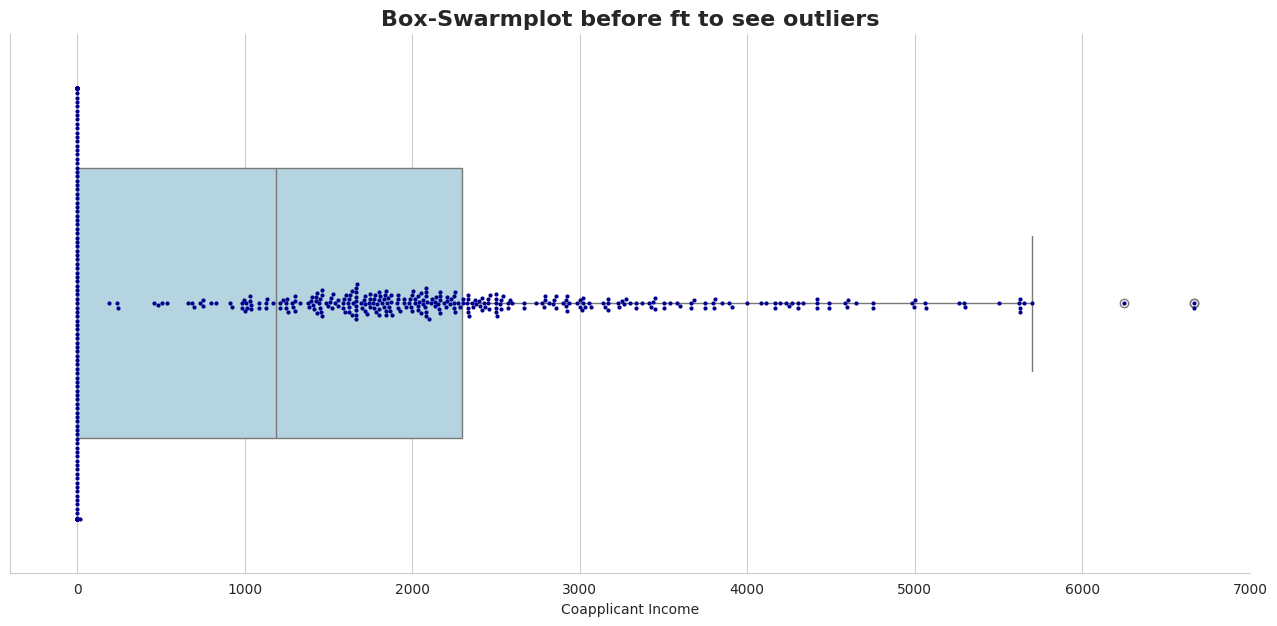

In [22]:

plt.figure(figsize= (16,7))
sns.set_style("whitegrid")
plt.xlim(left = -400, right = 7000)
plt.title("Box-Swarmplot before ft to see outliers",fontsize = 16, fontweight = "bold")

sns.boxplot(
    
    x = "CoapplicantIncome",
    data = d,
    width = 0.5,
    color = "lightblue",
    zorder = 1
)

sns.swarmplot(
    x = "CoapplicantIncome",
    data = d,
    color = "darkblue",
    size = 3,
    zorder = 2,
)

sns.despine()
plt.xlabel("Coapplicant Income")
plt.show()

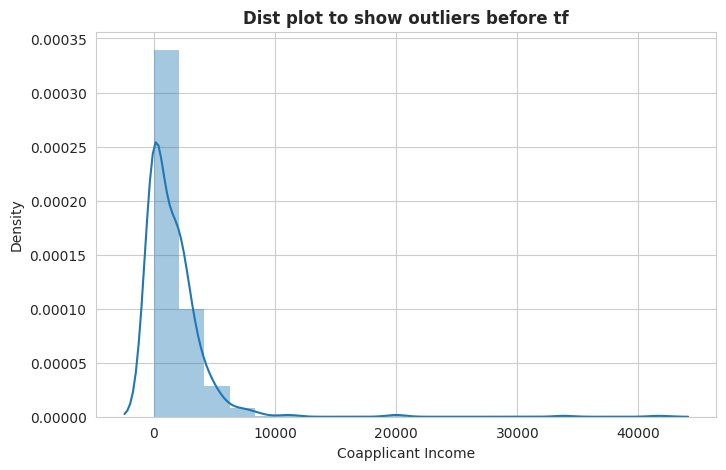

In [23]:
# distribution plot for the Coapplicant Income before tf to see the outliers
plt.figure(figsize = (8,5))
plt.title("Dist plot to show outliers before tf", fontweight = "bold")
sns.histplot(
    x = "CoapplicantIncome",
    data = d,
    stat = "density",
    kde = True,
    kde_kws = dict(cut = 3),
    edgecolor = (1,1,1,0),
    alpha = 0.4,
    bins = 20
)

plt.xlabel("Coapplicant Income")
plt.show()

In [24]:
# here removing the outlier is necessary

q1 = d["CoapplicantIncome"].quantile(0.25)
q3 = d["CoapplicantIncome"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5*iqr

upper_bound = q3 + 1.5*iqr

d["CoapplicantIncome_iqr"] = d["CoapplicantIncome"].clip(lower = lower_bound, upper = upper_bound)

In [25]:
# now performing function tranformation
ft2.fit(d["CoapplicantIncome_iqr"])

FunctionTransformer(func=<function <lambda> at 0x7dc608b0a200>)

In [26]:
d["CoapplicantIncome_x**2ft"] = ft2.transform(d[["CoapplicantIncome_iqr"]])

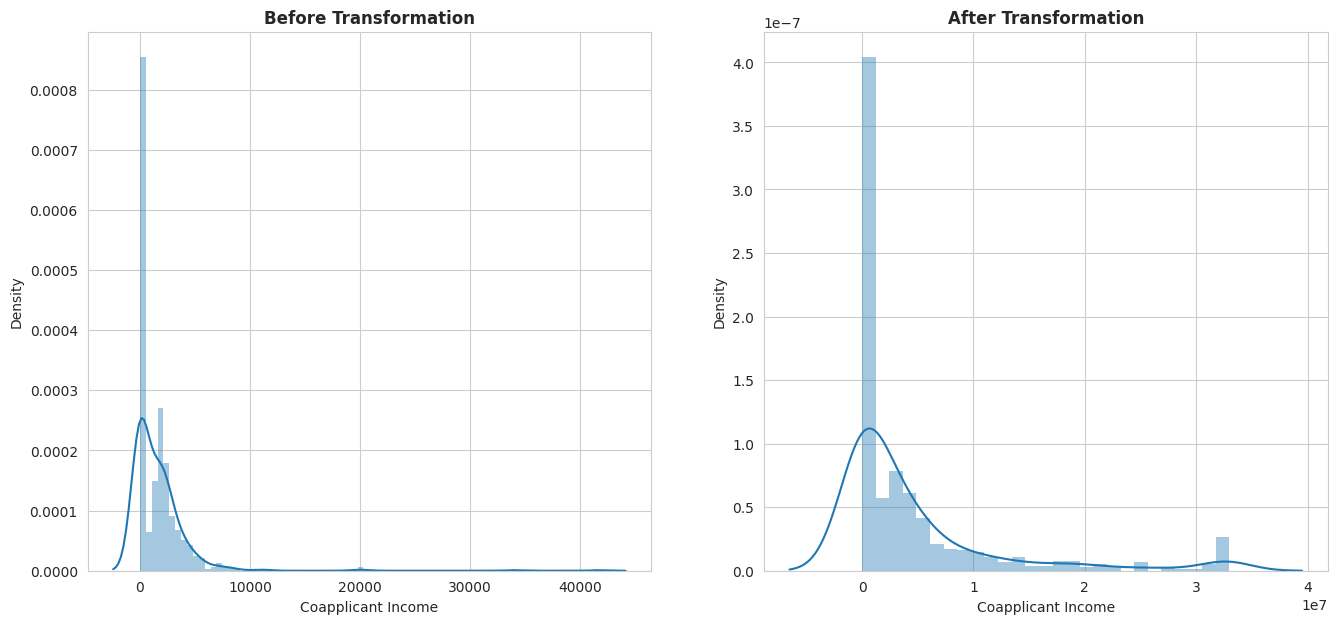

In [27]:
# now comparison of previous dist and after transformation

plt.figure(figsize = (16,7))

plt.subplot(1,2,1)
plt.title("Before Transformation", fontweight= "bold")
sns.histplot(
    x= "CoapplicantIncome",
    data = d,
    stat = "density",
    kde = True,
    kde_kws = dict(cut = 3),
    edgecolor= [1,1,1,0],
    alpha = 0.4,
)
plt.xlabel("Coapplicant Income")

plt.subplot(1,2,2)
plt.title("After Transformation",fontweight = "bold")
sns.histplot(
    x = "CoapplicantIncome_x**2ft",
    data = d,
    stat = "density",
    kde = True,
    kde_kws = dict(cut  = 3),
    edgecolor = [1,1,1,0],
    alpha = 0.4,
    
)
plt.xlabel("Coapplicant Income")

plt.show()

/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/akash/myEnv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


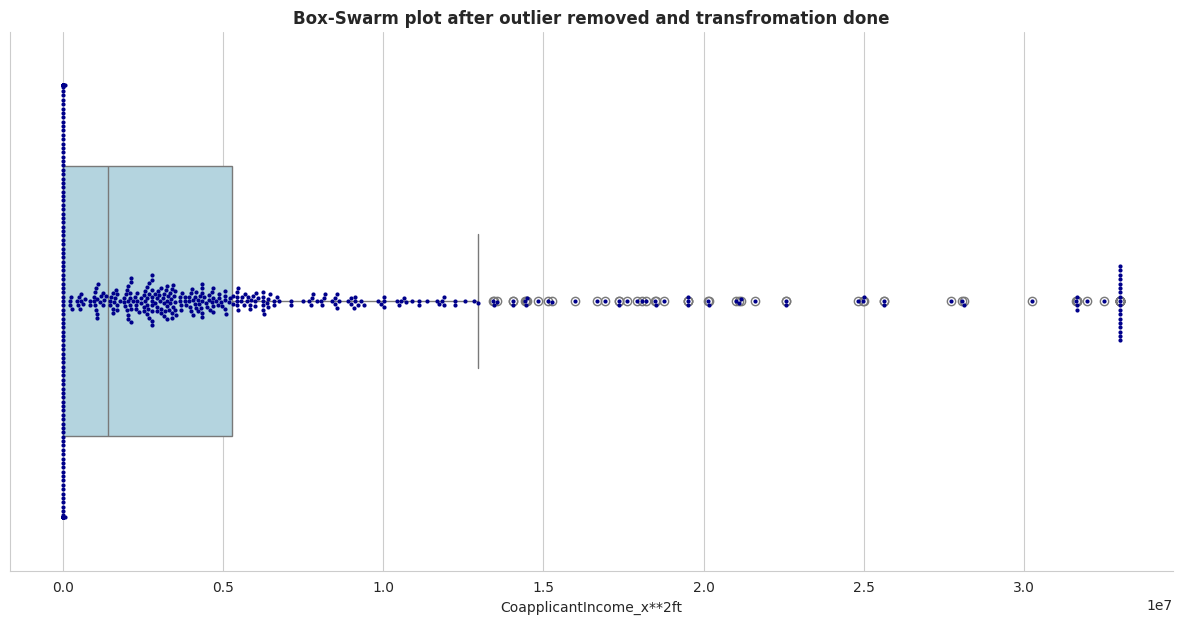

In [30]:
# now box and swarm plot

plt.figure(figsize = (15,7))
plt.title("Box-Swarm plot after outlier removed and transfromation done",fontweight = "bold")

sns.boxplot(
    x = "CoapplicantIncome_x**2ft",
    data = d,
    width = 0.5,
    color = "lightblue",
    zorder = 1,
)

sns.swarmplot(
    x = "CoapplicantIncome_x**2ft",
    data = d,
    color = "darkblue",
    size = 3,
    zorder = 2
)

sns.despine()
plt.show()

# 🌟🌟🌟 **NOTE for the transformation i have done using the `FunctionTransformer(func = lambda x : x ** 2)`**

- The Effect of the $x^2$ TransformationYou applied the transformation $f(x) = x^2$ to your variable, which appears to be CoapplicantIncome. 
- This transformation is non-linear and has a significant effect:
    - **It stretches the right tail**: Squaring the data greatly increases the spread (variance) of the larger values relative to the smaller values. For example, the difference between $10$ and $20$ is $10$, but the difference between their squares ($100$ and $400$) is $300$.
    - **It can create new box plot outliers:** Even if your original data had no outliers according to some statistical method (like the $1.5 \times \text{IQR}$ rule or a z-score method) before the transformation, applying $x^2$ can create new relative extremes that fall beyond the $1.5 \times \text{IQR}$ fences of the transformed data.